<a href="https://colab.research.google.com/github/currencyfxjle/PM_Challenge_PortfolioEfficientAllocation-FinancialModelCreation/blob/main/PM_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 79.3 MB/s eta 0:00:00


# **CHALLENGE 1:**

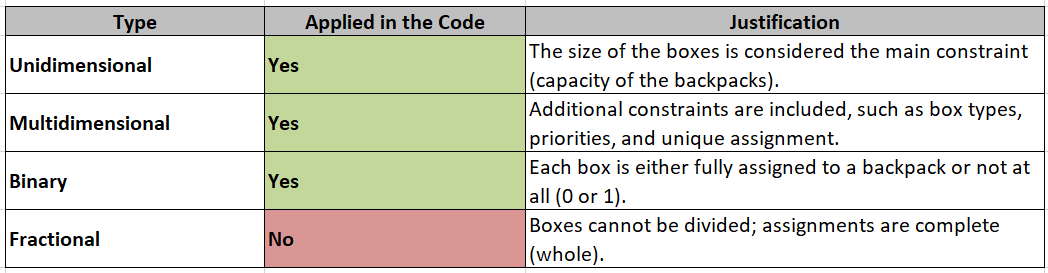

**Step 1: Define Data for Boxes and Backpacks**

This step initializes the data for boxes and backpacks, including attributes like size, priority, type, and capacity.

In [1]:
# Step 1: Define Data

# Data for boxes
boxes = [
    {"id": f"B{i+1}", "type": "A" if i < 10 else "B", "size": size, "priority": priority}
    for i, (size, priority) in enumerate(
        zip([5, 3, 8, 7, 2, 4, 9, 6, 3, 5, 7, 6, 8, 9, 4, 5, 2, 3, 6, 4],
            [1, 2, 3, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3])
    )
]

# Data for backpacks
backpacks = [
    {"id": f"BP{i+1}", "capacity": capacity}
    for i, capacity in enumerate([20, 15, 10, 25, 18, 30, 12, 17, 22, 16])
]

# Display initial data
print("Boxes:")
for box in boxes:
    print(box)

print("\nBackpacks:")
for bp in backpacks:
    print(bp)


Boxes:
{'id': 'B1', 'type': 'A', 'size': 5, 'priority': 1}
{'id': 'B2', 'type': 'A', 'size': 3, 'priority': 2}
{'id': 'B3', 'type': 'A', 'size': 8, 'priority': 3}
{'id': 'B4', 'type': 'A', 'size': 7, 'priority': 1}
{'id': 'B5', 'type': 'A', 'size': 2, 'priority': 3}
{'id': 'B6', 'type': 'A', 'size': 4, 'priority': 2}
{'id': 'B7', 'type': 'A', 'size': 9, 'priority': 1}
{'id': 'B8', 'type': 'A', 'size': 6, 'priority': 3}
{'id': 'B9', 'type': 'A', 'size': 3, 'priority': 2}
{'id': 'B10', 'type': 'A', 'size': 5, 'priority': 1}
{'id': 'B11', 'type': 'B', 'size': 7, 'priority': 3}
{'id': 'B12', 'type': 'B', 'size': 6, 'priority': 2}
{'id': 'B13', 'type': 'B', 'size': 8, 'priority': 1}
{'id': 'B14', 'type': 'B', 'size': 9, 'priority': 3}
{'id': 'B15', 'type': 'B', 'size': 4, 'priority': 2}
{'id': 'B16', 'type': 'B', 'size': 5, 'priority': 1}
{'id': 'B17', 'type': 'B', 'size': 2, 'priority': 3}
{'id': 'B18', 'type': 'B', 'size': 3, 'priority': 2}
{'id': 'B19', 'type': 'B', 'size': 6, 'priority'

**Step 2: Setup the Optimization Problem**

Define the linear programming problem, decision variables, and objective function.

In [4]:
from pulp import LpProblem, LpVariable, LpMaximize, lpSum

# Step 2: Setup Optimization Problem

# Create the LP problem
prob = LpProblem("Enhanced_Backpack_Allocation", LpMaximize)

# Decision variables: Assigning each box to a backpack
x = {
    (box["id"], bp["id"]): LpVariable(f"x_{box['id']}_{bp['id']}", 0, 1, cat="Binary")
    for box in boxes
    for bp in backpacks
}

# Objective Function: Maximize the sum of priorities with a slight penalty for size
prob += lpSum(
    x[box["id"], bp["id"]] * (box["priority"] - 0.1 * box["size"])  # Penalize larger boxes slightly
    for box in boxes
    for bp in backpacks
)


**Step 3: Add Constraints**

Introduce constraints for one-box-per-backpack, capacity limits, and type requirements.

In [5]:
# Step 3: Add Constraints

# Each box is assigned to at most one backpack
for box in boxes:
    prob += lpSum(x[box["id"], bp["id"]] for bp in backpacks) <= 1

# Total size of boxes in a backpack cannot exceed its capacity
for bp in backpacks:
    prob += lpSum(x[box["id"], bp["id"]] * box["size"] for box in boxes) <= bp["capacity"]

# Ensure at least one Type A box per backpack
for bp in backpacks:
    prob += lpSum(
        x[box["id"], bp["id"]] for box in boxes if box["type"] == "A"
    ) >= 1


**Step 4: Solve the Problem**

Solve the problem and extract the solution.

python
Copiar código


**Portfolio Efficient Allocation**

This allocation mirrors real-world portfolio problems, where limited resources (backpacks) must be allocated optimally across competing demands (boxes).

Constraints and penalties (e.g., penalizing larger boxes) mimic trade-offs in portfolio management.

In [6]:
# Step 4: Solve the Problem

# Solve the optimization problem
prob.solve()

# Output the allocation results
allocation = []
for box in boxes:
    for bp in backpacks:
        if x[box["id"], bp["id"]].value() == 1:
            allocation.append((box["id"], box["type"], bp["id"]))

# Display results
print("\nAllocation Results:")
for alloc in allocation:
    print(f"Box {alloc[0]} (Type {alloc[1]}) -> Backpack {alloc[2]}")

# Check for unallocated boxes
unallocated_boxes = [box["id"] for box in boxes if all(x[box["id"], bp["id"]].value() == 0 for bp in backpacks)]
if unallocated_boxes:
    print("\nUnallocated Boxes:", unallocated_boxes)
else:
    print("\nAll boxes successfully allocated!")



Allocation Results:
Box B1 (Type A) -> Backpack BP5
Box B2 (Type A) -> Backpack BP4
Box B3 (Type A) -> Backpack BP8
Box B4 (Type A) -> Backpack BP2
Box B5 (Type A) -> Backpack BP10
Box B6 (Type A) -> Backpack BP7
Box B7 (Type A) -> Backpack BP3
Box B8 (Type A) -> Backpack BP9
Box B9 (Type A) -> Backpack BP1
Box B10 (Type A) -> Backpack BP6
Box B11 (Type B) -> Backpack BP6
Box B12 (Type B) -> Backpack BP10
Box B13 (Type B) -> Backpack BP8
Box B14 (Type B) -> Backpack BP4
Box B15 (Type B) -> Backpack BP4
Box B16 (Type B) -> Backpack BP5
Box B17 (Type B) -> Backpack BP5
Box B18 (Type B) -> Backpack BP4
Box B19 (Type B) -> Backpack BP7
Box B20 (Type B) -> Backpack BP1

All boxes successfully allocated!


**Step 5: Analyze Results**

Calculate backpack utilization and analyze how efficiently the space is used.

**Objective:**

Maximize the total value that can be allocated on the backpack respecting their capacity & constraints.

**Restrictions:**

Each box can be assigned to a single backpack.

The sum of the size of the assigned boxes cannot exceed the capacity of the backpack.

Each backpack must contain at least one type A box.

In [7]:
# Step 5: Analyze Results

# Display backpack utilization
print("\nBackpack Utilization:")
for bp in backpacks:
    used_capacity = sum(
        x[box["id"], bp["id"]].value() * box["size"] for box in boxes
    )
    print(f"{bp['id']} - Used: {used_capacity}/{bp['capacity']} ({(used_capacity / bp['capacity']) * 100:.2f}%)")



Backpack Utilization:
BP1 - Used: 7.0/20 (35.00%)
BP2 - Used: 7.0/15 (46.67%)
BP3 - Used: 9.0/10 (90.00%)
BP4 - Used: 19.0/25 (76.00%)
BP5 - Used: 12.0/18 (66.67%)
BP6 - Used: 12.0/30 (40.00%)
BP7 - Used: 10.0/12 (83.33%)
BP8 - Used: 16.0/17 (94.12%)
BP9 - Used: 6.0/22 (27.27%)
BP10 - Used: 8.0/16 (50.00%)


**Implementation with Interactive DataFrame**

In [8]:
!pip install pandas plotly


In [9]:
import pandas as pd
import plotly.express as px
from IPython.display import display

# Step 4: Convert Allocation Results into a DataFrame
allocation_data = []
for box in boxes:
    for bp in backpacks:
        if x[box["id"], bp["id"]].value() == 1:
            allocation_data.append({
                "Box ID": box["id"],
                "Type": box["type"],
                "Size": box["size"],
                "Priority": box["priority"],
                "Assigned Backpack": bp["id"]
            })

# Create an interactive DataFrame
allocation_df = pd.DataFrame(allocation_data)
print("\nInteractive Allocation Results:")
display(allocation_df)

# Step 5: Convert Backpack Utilization into a DataFrame
utilization_data = []
for bp in backpacks:
    used_capacity = sum(
        x[box["id"], bp["id"]].value() * box["size"] for box in boxes
    )
    utilization_data.append({
        "Backpack ID": bp["id"],
        "Capacity": bp["capacity"],
        "Used Capacity": used_capacity,
        "Utilization (%)": round((used_capacity / bp["capacity"]) * 100, 2)
    })

# Create an interactive DataFrame
utilization_df = pd.DataFrame(utilization_data)
print("\nInteractive Backpack Utilization:")
display(utilization_df)

# Optional: Create a visualization for backpack utilization
fig = px.bar(utilization_df, x="Backpack ID", y="Utilization (%)",
             title="Backpack Utilization", text="Utilization (%)")
fig.show()



Interactive Allocation Results:


,Box ID,Type,Size,Priority,Assigned Backpack
0,B1,A,5,1,BP5
1,B2,A,3,2,BP4
2,B3,A,8,3,BP8
3,B4,A,7,1,BP2
4,B5,A,2,3,BP10
5,B6,A,4,2,BP7
6,B7,A,9,1,BP3
7,B8,A,6,3,BP9
8,B9,A,3,2,BP1
9,B10,A,5,1,BP6



Interactive Backpack Utilization:


,Backpack ID,Capacity,Used Capacity,Utilization (%)
0,BP1,20,7.0,35.00
1,BP2,15,7.0,46.67
2,BP3,10,9.0,90.00
3,BP4,25,19.0,76.00
4,BP5,18,12.0,66.67
5,BP6,30,12.0,40.00
6,BP7,12,10.0,83.33
7,BP8,17,16.0,94.12
8,BP9,22,6.0,27.27
9,BP10,16,8.0,50.00


# **CHALLENGE 2**

In [1]:
!pip install pandas numpy_financial openpyxl xlwings


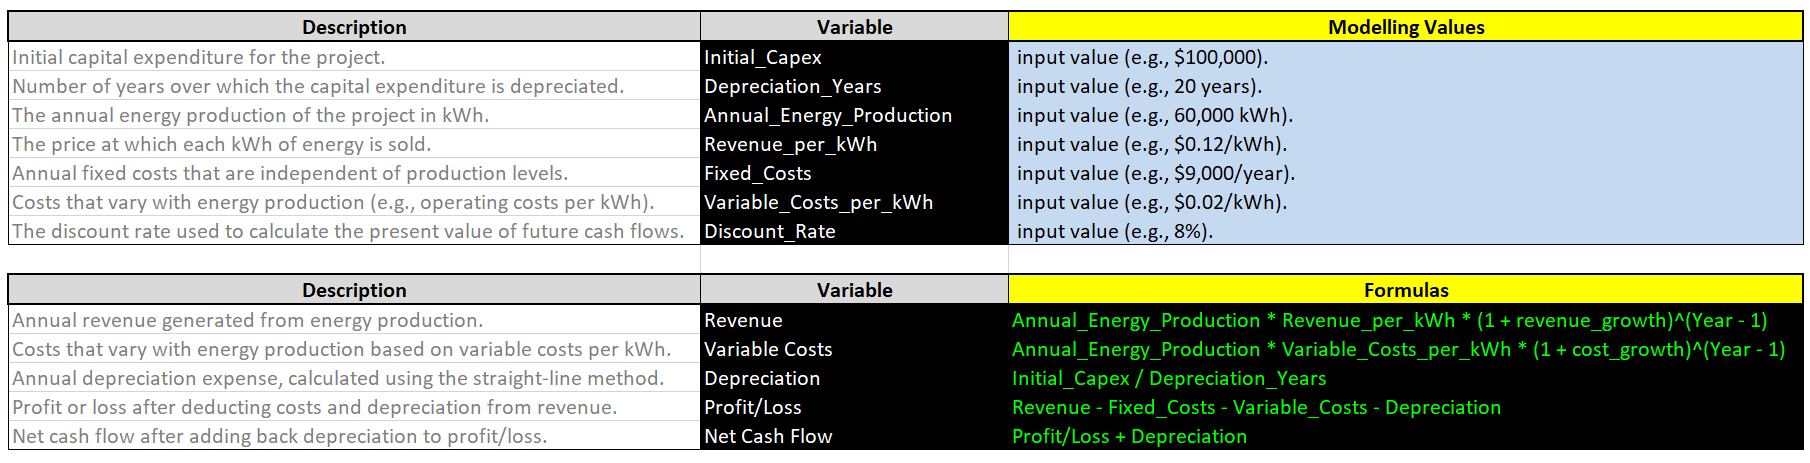

In [8]:
import pandas as pd
import numpy_financial as npf
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from io import BytesIO

# Define assumptions
assumptions = {
    "Initial_Capex": 100000,  # Capital Expenditure in USD
    "Depreciation_Years": 20,  # Depreciation period in years
    "Annual_Energy_Production": 60000,  # Increased base energy production for realistic results
    "Revenue_per_kWh": 0.12,  # Adjusted revenue per kWh
    "Fixed_Costs": 9000,  # Slightly reduced fixed costs for better cash flows
    "Variable_Costs_per_kWh": 0.02,  # Variable cost per kWh in USD
    "Discount_Rate": 0.08  # Discount rate for NPV and IRR calculations
}

# Create the base proforma financial model
def create_proforma(assumptions, revenue_growth=0, cost_growth=0):
    years = range(1, 21)  # 20-year financial model
    proforma = []

    for year in years:
        revenue = assumptions["Annual_Energy_Production"] * assumptions["Revenue_per_kWh"] * (1 + revenue_growth) ** (year - 1)
        variable_costs = assumptions["Annual_Energy_Production"] * assumptions["Variable_Costs_per_kWh"] * (1 + cost_growth) ** (year - 1)
        depreciation = assumptions["Initial_Capex"] / assumptions["Depreciation_Years"]
        profit = revenue - assumptions["Fixed_Costs"] - variable_costs - depreciation
        net_cash_flow = profit + depreciation
        proforma.append({
            "Year": year,
            "Revenue": revenue,
            "Fixed Costs": assumptions["Fixed_Costs"],
            "Variable Costs": variable_costs,
            "Depreciation": depreciation,
            "Profit/Loss": profit,
            "Net Cash Flow": net_cash_flow
        })

    return pd.DataFrame(proforma)

# Define scenarios with adjusted assumptions
scenarios = {
    "High": {"revenue_growth": 0.18, "cost_growth": 0.03},  # Increased revenue growth for positive NPV
    "Medium": {"revenue_growth": 0.08, "cost_growth": 0.02},  # Balanced growth
    "Low": {"revenue_growth": 0.02, "cost_growth": 0.01}  # Adjusted costs and revenue growth for valid IRR
}

# Create workbook and initialize the summary sheet
wb = Workbook()
ws_summary = wb.active
ws_summary.title = "Summary"
ws_summary.append(["Scenario", "NPV", "IRR (%)"])

# Process each scenario
for scenario_name, params in scenarios.items():
    proforma_df = create_proforma(assumptions, **params)

    # Calculate NPV and IRR
    cash_flows = proforma_df["Net Cash Flow"].tolist()
    cash_flows.insert(0, -assumptions["Initial_Capex"])  # Add initial investment as the first cash flow
    npv = npf.npv(assumptions["Discount_Rate"], cash_flows)

    try:
        irr = npf.irr(cash_flows) * 100  # Convert IRR to percentage
        irr = round(irr, 2)  # Round IRR to 2 decimal places
    except:
        irr = None  # Handle IRR calculation issues gracefully

    # Add results to the summary sheet
    ws_summary.append([scenario_name, round(npv, 2), irr if irr is not None else "N/A"])

    # Add detailed proforma to a new sheet
    ws_scenario = wb.create_sheet(title=scenario_name)
    for row in dataframe_to_rows(proforma_df, index=False, header=True):
        ws_scenario.append(row)

# Save the workbook
file_path = "Proforma_Financial_Model_Fixed.xlsx"
wb.save(file_path)

print(f"Workbook saved to {file_path}")


Workbook saved to Proforma_Financial_Model_Fixed.xlsx


**INTERACTTIVE DASHBOARD**

In [10]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [14]:
import pandas as pd
import numpy_financial as npf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define assumptions
assumptions = {
    "Initial_Capex": 100000,  # Capital Expenditure in USD
    "Depreciation_Years": 20,  # Depreciation period in years
    "Annual_Energy_Production": 60000,  # Increased base energy production for realistic results
    "Revenue_per_kWh": 0.12,  # Adjusted revenue per kWh
    "Fixed_Costs": 9000,  # Slightly reduced fixed costs for better cash flows
    "Variable_Costs_per_kWh": 0.02,  # Variable cost per kWh in USD
    "Discount_Rate": 0.08  # Discount rate for NPV and IRR calculations
}

# Create the base proforma financial model
def create_proforma(assumptions, revenue_growth=0, cost_growth=0):
    years = range(1, 21)  # 20-year financial model
    proforma = []

    for year in years:
        revenue = assumptions["Annual_Energy_Production"] * assumptions["Revenue_per_kWh"] * (1 + revenue_growth) ** (year - 1)
        variable_costs = assumptions["Annual_Energy_Production"] * assumptions["Variable_Costs_per_kWh"] * (1 + cost_growth) ** (year - 1)
        depreciation = assumptions["Initial_Capex"] / assumptions["Depreciation_Years"]
        profit = revenue - assumptions["Fixed_Costs"] - variable_costs - depreciation
        net_cash_flow = profit + depreciation
        proforma.append({
            "Year": year,
            "Revenue": revenue,
            "Fixed Costs": assumptions["Fixed_Costs"],
            "Variable Costs": variable_costs,
            "Depreciation": depreciation,
            "Profit/Loss": profit,
            "Net Cash Flow": net_cash_flow
        })

    return pd.DataFrame(proforma)

# Define scenarios with adjusted assumptions
scenarios = {
    "High": {"revenue_growth": 0.18, "cost_growth": 0.03},  # Increased revenue growth for positive NPV
    "Medium": {"revenue_growth": 0.08, "cost_growth": 0.02},  # Balanced growth
    "Low": {"revenue_growth": 0.02, "cost_growth": 0.01}  # Adjusted costs and revenue growth for valid IRR
}

# Collect all results for interactive visualization
all_results = []

# Process each scenario
for scenario_name, params in scenarios.items():
    proforma_df = create_proforma(assumptions, **params)

    # Calculate NPV and IRR
    cash_flows = proforma_df["Net Cash Flow"].tolist()
    cash_flows.insert(0, -assumptions["Initial_Capex"])  # Add initial investment as the first cash flow
    npv = npf.npv(assumptions["Discount_Rate"], cash_flows)

    try:
        irr = npf.irr(cash_flows) * 100  # Convert IRR to percentage
        irr = round(irr, 2)  # Round IRR to 2 decimal places
    except:
        irr = None  # Handle IRR calculation issues gracefully

    # Add results to the overall results dataframe
    proforma_df["Scenario"] = scenario_name
    all_results.append(proforma_df)

# Combine all results into one DataFrame
combined_df = pd.concat(all_results)

# Plotly Interactive DataFrames and Charts
# 1. Interactive DataFrame with Plotly
import dash
from dash import dash_table, html, dcc

# Create Dash app
app = dash.Dash(__name__)

# Prepare data for plotting
summary_df = combined_df.groupby("Scenario").agg({
    "Net Cash Flow": "sum",
    "Revenue": "sum",
    "Fixed Costs": "sum",
    "Variable Costs": "sum",
}).reset_index()

# Charts
fig = make_subplots(rows=2, cols=2, subplot_titles=("Net Cash Flow", "Revenue vs Costs", "Profit/Loss by Year"))

# Net Cash Flow over Years
for scenario in combined_df["Scenario"].unique():
    scenario_data = combined_df[combined_df["Scenario"] == scenario]
    fig.add_trace(
        go.Scatter(x=scenario_data["Year"], y=scenario_data["Net Cash Flow"], mode="lines", name=f"{scenario} Cash Flow"),
        row=1, col=1
    )

# Revenue vs Costs
for scenario in combined_df["Scenario"].unique():
    scenario_data = combined_df[combined_df["Scenario"] == scenario]
    fig.add_trace(
        go.Scatter(x=scenario_data["Year"], y=scenario_data["Revenue"], mode="lines", name=f"{scenario} Revenue"),
        row=1, col=2
    )
    fig.add_trace(
        go.Scatter(x=scenario_data["Year"], y=scenario_data["Fixed Costs"] + scenario_data["Variable Costs"], mode="lines", name=f"{scenario} Costs"),
        row=1, col=2
    )

# Profit/Loss by Year
for scenario in combined_df["Scenario"].unique():
    scenario_data = combined_df[combined_df["Scenario"] == scenario]
    fig.add_trace(
        go.Bar(x=scenario_data["Year"], y=scenario_data["Profit/Loss"], name=f"{scenario} Profit/Loss"),
        row=2, col=1
    )

# Layout adjustment
fig.update_layout(height=800, width=1000, title_text="Financial Modeling Scenarios", showlegend=True)

# Dash Layout
app.layout = html.Div([
    html.H1("Proforma Financial Model"),
    dash_table.DataTable(
        id='interactive-table',
        columns=[{"name": i, "id": i} for i in summary_df.columns],
        data=summary_df.to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={'textAlign': 'left'}
    ),
    dcc.Graph(figure=fig)
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

**pyngrok**

Purpose:

pyngrok is used to expose local servers (like the Dash app) to the internet via a public URL.
In this project, it allows the Dash application running on localhost (port 8050) to be accessible online through an Ngrok tunnel.
How It Works:

Ngrok creates a secure tunnel from a public URL to your local machine.
This is especially useful in environments like Colab where direct access to localhost is not possible.

In [1]:
# Install necessary libraries
!pip install pyngrok dash numpy-financial plotly

# Import libraries
import pandas as pd
import numpy_financial as npf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pyngrok import ngrok
import dash
from dash import dash_table, html, dcc

# Define assumptions
assumptions = {
    "Initial_Capex": 100000,  # Capital Expenditure in USD
    "Depreciation_Years": 20,  # Depreciation period in years
    "Annual_Energy_Production": 60000,  # Increased base energy production for realistic results
    "Revenue_per_kWh": 0.12,  # Adjusted revenue per kWh
    "Fixed_Costs": 9000,  # Slightly reduced fixed costs for better cash flows
    "Variable_Costs_per_kWh": 0.02,  # Variable cost per kWh in USD
    "Discount_Rate": 0.08  # Discount rate for NPV and IRR calculations
}

# Create the base proforma financial model
def create_proforma(assumptions, revenue_growth=0, cost_growth=0):
    years = range(1, 21)  # 20-year financial model
    proforma = []

    for year in years:
        revenue = assumptions["Annual_Energy_Production"] * assumptions["Revenue_per_kWh"] * (1 + revenue_growth) ** (year - 1)
        variable_costs = assumptions["Annual_Energy_Production"] * assumptions["Variable_Costs_per_kWh"] * (1 + cost_growth) ** (year - 1)
        depreciation = assumptions["Initial_Capex"] / assumptions["Depreciation_Years"]
        profit = revenue - assumptions["Fixed_Costs"] - variable_costs - depreciation
        net_cash_flow = profit + depreciation
        proforma.append({
            "Year": year,
            "Revenue": revenue,
            "Fixed Costs": assumptions["Fixed_Costs"],
            "Variable Costs": variable_costs,
            "Depreciation": depreciation,
            "Profit/Loss": profit,
            "Net Cash Flow": net_cash_flow
        })

    return pd.DataFrame(proforma)

# Define scenarios with adjusted assumptions
scenarios = {
    "High": {"revenue_growth": 0.18, "cost_growth": 0.03},  # Increased revenue growth for positive NPV
    "Medium": {"revenue_growth": 0.08, "cost_growth": 0.02},  # Balanced growth
    "Low": {"revenue_growth": 0.02, "cost_growth": 0.01}  # Adjusted costs and revenue growth for valid IRR
}

# Collect all results for visualization
all_results = []

# Process each scenario
for scenario_name, params in scenarios.items():
    proforma_df = create_proforma(assumptions, **params)

    # Calculate NPV and IRR
    cash_flows = proforma_df["Net Cash Flow"].tolist()
    cash_flows.insert(0, -assumptions["Initial_Capex"])  # Add initial investment as the first cash flow
    npv = npf.npv(assumptions["Discount_Rate"], cash_flows)

    try:
        irr = npf.irr(cash_flows) * 100  # Convert IRR to percentage
        irr = round(irr, 2)  # Round IRR to 2 decimal places
    except:
        irr = None  # Handle IRR calculation issues gracefully

    # Add results to the overall results dataframe
    proforma_df["Scenario"] = scenario_name
    all_results.append(proforma_df)

# Combine all results into one DataFrame
combined_df = pd.concat(all_results)

# Prepare data for plotting
summary_df = combined_df.groupby("Scenario").agg({
    "Net Cash Flow": "sum",
    "Revenue": "sum",
    "Fixed Costs": "sum",
    "Variable Costs": "sum",
}).reset_index()

# Charts
fig = make_subplots(rows=2, cols=2, subplot_titles=("Net Cash Flow", "Revenue vs Costs", "Profit/Loss by Year"))

# Net Cash Flow over Years
for scenario in combined_df["Scenario"].unique():
    scenario_data = combined_df[combined_df["Scenario"] == scenario]
    fig.add_trace(
        go.Scatter(x=scenario_data["Year"], y=scenario_data["Net Cash Flow"], mode="lines", name=f"{scenario} Cash Flow"),
        row=1, col=1
    )

# Revenue vs Costs
for scenario in combined_df["Scenario"].unique():
    scenario_data = combined_df[combined_df["Scenario"] == scenario]
    fig.add_trace(
        go.Scatter(x=scenario_data["Year"], y=scenario_data["Revenue"], mode="lines", name=f"{scenario} Revenue"),
        row=1, col=2
    )
    fig.add_trace(
        go.Scatter(x=scenario_data["Year"], y=scenario_data["Fixed Costs"] + scenario_data["Variable Costs"], mode="lines", name=f"{scenario} Costs"),
        row=1, col=2
    )

# Profit/Loss by Year
for scenario in combined_df["Scenario"].unique():
    scenario_data = combined_df[combined_df["Scenario"] == scenario]
    fig.add_trace(
        go.Bar(x=scenario_data["Year"], y=scenario_data["Profit/Loss"], name=f"{scenario} Profit/Loss"),
        row=2, col=1
    )

# Layout adjustment
fig.update_layout(height=800, width=1000, title_text="Financial Modeling Scenarios", showlegend=True)

# Create Dash app
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Proforma Financial Model"),
    dash_table.DataTable(
        id='interactive-table',
        columns=[{"name": i, "id": i} for i in summary_df.columns],
        data=summary_df.to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={'textAlign': 'left'}
    ),
    dcc.Graph(figure=fig)
])

# Set up Ngrok to expose the app
public_url = ngrok.connect(8050)
print(f"Public URL: {public_url}")

# Run the Dash app
app.run_server(port=8050)

Public URL: NgrokTunnel: "https://e2f5-34-55-226-180.ngrok-free.app" -> "http://localhost:8050"


<IPython.core.display.Javascript object>

**Key Packages**

**kaleido**

Purpose: Export Plotly figures as static image files (e.g., PNG).

Converts interactive visualizations into shareable static images.


**orca**

Purpose: Alternative engine for exporting Plotly charts as static images.

# ***How These Libraries Work Together***

**Data Handling (pandas):**

Stores the results of the financial model in a tabular format.
Aggregates scenario results for visualization.

**Financial Metrics (numpy_financial):**

Computes critical financial KPIs (NPV, IRR) to assess scenario outcomes.

**Visualization (plotly):**

Converts raw financial data into clear, interactive visuals.

**Export (kaleido and orca):**

Transforms visualizations into static images for sharing.

**File Management (google.colab):**

Makes the results easily downloadable in the Colab environment.

In [1]:
# Install necessary packages
!pip install kaleido orca

In [2]:
import pandas as pd
import numpy_financial as npf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import files

# Define assumptions
assumptions = {
    "Initial_Capex": 100000,  # Capital Expenditure in USD
    "Depreciation_Years": 20,  # Depreciation period in years
    "Annual_Energy_Production": 60000,  # Increased base energy production for realistic results
    "Revenue_per_kWh": 0.12,  # Adjusted revenue per kWh
    "Fixed_Costs": 9000,  # Slightly reduced fixed costs for better cash flows
    "Variable_Costs_per_kWh": 0.02,  # Variable cost per kWh in USD
    "Discount_Rate": 0.08  # Discount rate for NPV and IRR calculations
}

# Create the base proforma financial model
def create_proforma(assumptions, revenue_growth=0, cost_growth=0):
    years = range(1, 21)  # 20-year financial model
    proforma = []

    for year in years:
        revenue = assumptions["Annual_Energy_Production"] * assumptions["Revenue_per_kWh"] * (1 + revenue_growth) ** (year - 1)
        variable_costs = assumptions["Annual_Energy_Production"] * assumptions["Variable_Costs_per_kWh"] * (1 + cost_growth) ** (year - 1)
        depreciation = assumptions["Initial_Capex"] / assumptions["Depreciation_Years"]
        profit = revenue - assumptions["Fixed_Costs"] - variable_costs - depreciation
        net_cash_flow = profit + depreciation
        proforma.append({
            "Year": year,
            "Revenue": revenue,
            "Fixed Costs": assumptions["Fixed_Costs"],
            "Variable Costs": variable_costs,
            "Depreciation": depreciation,
            "Profit/Loss": profit,
            "Net Cash Flow": net_cash_flow
        })

    return pd.DataFrame(proforma)

# Define scenarios with adjusted assumptions
scenarios = {
    "High": {"revenue_growth": 0.18, "cost_growth": 0.03},  # Increased revenue growth for positive NPV
    "Medium": {"revenue_growth": 0.08, "cost_growth": 0.02},  # Balanced growth
    "Low": {"revenue_growth": 0.02, "cost_growth": 0.01}  # Adjusted costs and revenue growth for valid IRR
}

# Collect all results for visualization
all_results = []

# Process each scenario
for scenario_name, params in scenarios.items():
    proforma_df = create_proforma(assumptions, **params)

    # Calculate NPV and IRR
    cash_flows = proforma_df["Net Cash Flow"].tolist()
    cash_flows.insert(0, -assumptions["Initial_Capex"])  # Add initial investment as the first cash flow
    npv = npf.npv(assumptions["Discount_Rate"], cash_flows)

    try:
        irr = npf.irr(cash_flows) * 100  # Convert IRR to percentage
        irr = round(irr, 2)  # Round IRR to 2 decimal places
    except:
        irr = None  # Handle IRR calculation issues gracefully

    # Add results to the overall results dataframe
    proforma_df["Scenario"] = scenario_name
    all_results.append(proforma_df)

# Combine all results into one DataFrame
combined_df = pd.concat(all_results)

# Prepare data for plotting
summary_df = combined_df.groupby("Scenario").agg({
    "Net Cash Flow": "sum",
    "Revenue": "sum",
    "Fixed Costs": "sum",
    "Variable Costs": "sum",
}).reset_index()

# Generate charts
fig = make_subplots(rows=2, cols=2, subplot_titles=("Net Cash Flow", "Revenue vs Costs", "Profit/Loss by Year"))

# Net Cash Flow over Years
for scenario in combined_df["Scenario"].unique():
    scenario_data = combined_df[combined_df["Scenario"] == scenario]
    fig.add_trace(
        go.Scatter(x=scenario_data["Year"], y=scenario_data["Net Cash Flow"], mode="lines", name=f"{scenario} Cash Flow"),
        row=1, col=1
    )

# Revenue vs Costs
for scenario in combined_df["Scenario"].unique():
    scenario_data = combined_df[combined_df["Scenario"] == scenario]
    fig.add_trace(
        go.Scatter(x=scenario_data["Year"], y=scenario_data["Revenue"], mode="lines", name=f"{scenario} Revenue"),
        row=1, col=2
    )
    fig.add_trace(
        go.Scatter(x=scenario_data["Year"], y=scenario_data["Fixed Costs"] + scenario_data["Variable Costs"], mode="lines", name=f"{scenario} Costs"),
        row=1, col=2
    )

# Profit/Loss by Year
for scenario in combined_df["Scenario"].unique():
    scenario_data = combined_df[combined_df["Scenario"] == scenario]
    fig.add_trace(
        go.Bar(x=scenario_data["Year"], y=scenario_data["Profit/Loss"], name=f"{scenario} Profit/Loss"),
        row=2, col=1
    )

# Layout adjustment
fig.update_layout(height=800, width=1000, title_text="Financial Modeling Scenarios", showlegend=True)

# Save the entire figure as a PNG image using Kaleido
try:
    fig.write_image("Financial_Modeling_Scenarios.png")
    files.download("Financial_Modeling_Scenarios.png")  # Provide download link
except ValueError:
    print("Kaleido is not working. Saving as an HTML file instead.")
    fig.write_html("Financial_Modeling_Scenarios.html")
    files.download("Financial_Modeling_Scenarios.html")  # Provide download link for HTML

# Alternative: If Kaleido fails, use Orca
try:
    fig.write_image("Financial_Modeling_Scenarios.png", engine="orca")
    files.download("Financial_Modeling_Scenarios.png")
except Exception as e:
    print("Orca is also unavailable. Consider saving as an interactive HTML.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Orca is also unavailable. Consider saving as an interactive HTML.
